## Steps

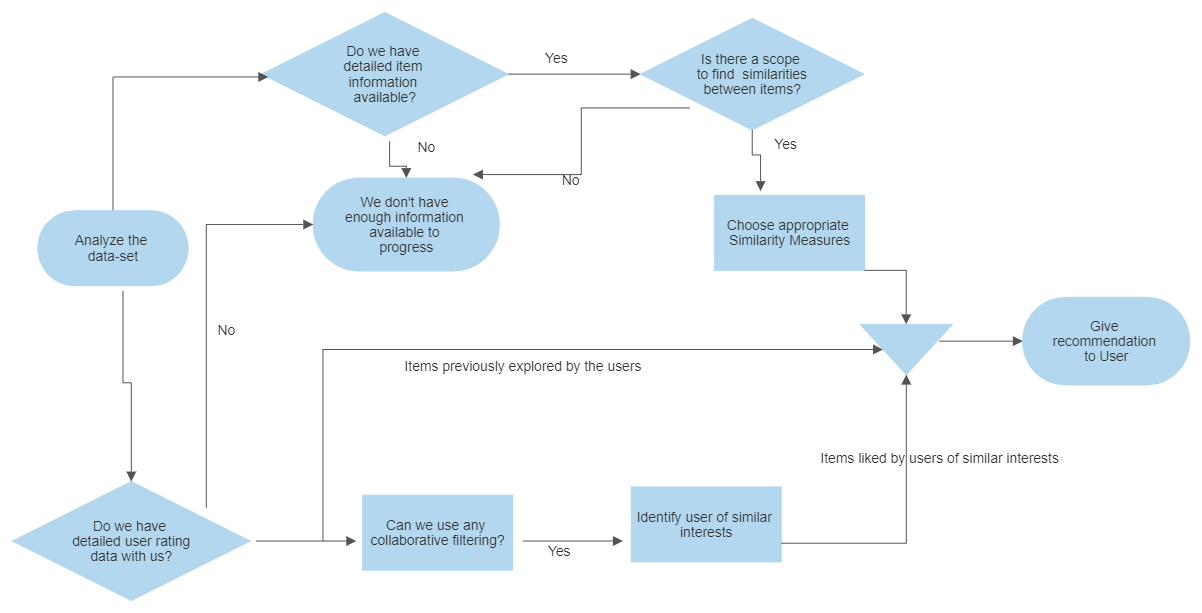

In [2]:
from datetime import datetime
import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from scipy import sparse
from scipy.sparse import csc_matrix
from sklearn.decomposition import TruncatedSVD


## Analyse Dataset


### Movie lens Dataset
https://grouplens.org/datasets/movielens/


In [3]:
movies_df=pd.read_csv("movies.csv")
movies_df = movies_df.dropna()
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
links_df=pd.read_csv("links.csv")
links_df = links_df.dropna()
links_df=links_df[['movieId','tmdbId']]


In [5]:
rating_df=pd.read_csv("ratings.csv")
rating_df = rating_df.dropna()
rating_df=rating_df[['userId','movieId','rating','timestamp']]
rating_df.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [6]:
tags_df=pd.read_csv("tags.csv")
tags_df = tags_df.dropna()
tags_df.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


### TMDB 5000 Movie Dataset
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [7]:
tmdp_df=pd.read_csv("tmdb_5000_movies.csv")
tmdp_df = tmdp_df.dropna()
tmdp_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [8]:
credit_df=pd.read_csv("tmdb_5000_credits.csv")
credit_df = credit_df.dropna()
credit_df.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [10]:
tmdp_df['genres'] = tmdp_df['genres'].apply(convert)
tmdp_df['keywords'] = tmdp_df['keywords'].apply(convert)
credit_df['cast'] = credit_df['cast'].apply(convert3)
credit_df['crew'] = credit_df['crew'].apply(convert3)
tmdp_df = tmdp_df.merge(credit_df,on='title')

### Merging two dataset
- We can clearly see both dataset can be merged using movieid and tmdbid 

In [11]:

movies_df = movies_df.merge(links_df,on='movieId', how="inner")

In [12]:

movies_df=movies_df .merge(tmdp_df,left_on='tmdbId',right_on='id', how="inner")  

In [13]:
movies_df.rename(columns = {'title_y':'title', 'genres_y':'genres'}, inplace = True)

In [14]:
movies_df=movies_df[['movieId','title','keywords','genres', 'popularity', 'vote_count','vote_average','overview','cast','crew']]

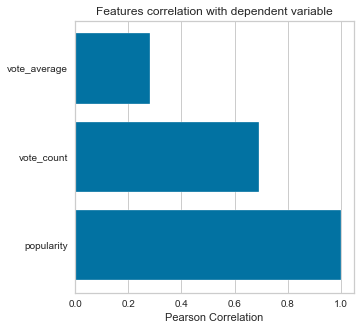

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [15]:
from yellowbrick.target import FeatureCorrelation

feature_names = [ 'popularity', 'vote_count','vote_average']

X, y = movies_df[feature_names], movies_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(5,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

## Final dataset

In [16]:
movies_df.head(1)

,movieId,title,keywords,genres,popularity,vote_count,vote_average,overview,cast,crew
0,10,GoldenEye,"[cuba, falsely accused, secret identity, compu...","[Adventure, Action, Thriller]",59.824565,1174,6.6,James Bond must unmask the mysterious head of ...,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]","[Eric Serra, Tina Turner, Ian Fleming]"


In [17]:
rating_df.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [18]:
tags_df.head(1)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994


## Analysis of the Dataset

### Do we have detailed item( movie ) information available?   <font color='green'>Yes</font>
### Is there any scope to find similarities among items ?   <font color='green'>Yes</font>


#### Next steps: 
- When we think of recommending to users the best movies, we should consider various factors that impact this decision. Like Some users may be inclined towards a specific type of movie say -Action or Romantic. Some may like movies with the famous actor, actresses or Directors. Some people even consider popularity or average rating before playing any movies.

#### So tasks in  hand:
##### Contant based filtering
- Find a list of movies based on popularity, average rating, and other metrics. This data is useful to give recommendations to a new user.
- Identify movies similar in nature. It helps the system to recommend new movies to users whose historical data is available to the system.
- Recommend user based on previous rating

##### Colaborative based filtering
- Identify user of similar interese 

## Task 1: Popularity based Filtering


- This kind of filtering shows most popular movies of a particular types.It is useful cases when a recommender system recomends items  to a new user. For example - suppose the user selected an Action movie as a  preference - the system could list down popular action movies.

##### So based on the data we have. We can consider the following approach :
- a) We look at the popularity column of our dataset and recommend the top 10 movies to the user.
- b) We can also consider the average rating of a particular movie in our consideration
- c) We can also take a weighted average of the above columns.

#### There could be many others ways for popularity based recommendations

### a) Following are list of movies based on popularities

In [19]:
movie_recommendation_by_popularity=movies_df.sort_values('popularity', ascending=[False])
movie_recommendation_by_popularity=movie_recommendation_by_popularity[:10]
movie_recommendation_by_popularity[['title', 'popularity','vote_average','genres']]

,title,popularity,vote_average,genres
1137,Minions,875.581305,6.4,"[Family, Animation, Adventure, Comedy]"
1042,Interstellar,724.247784,8.1,"[Adventure, Drama, Science Fiction]"
1103,Deadpool,514.569956,7.4,"[Action, Adventure, Comedy]"
1062,Guardians of the Galaxy,481.098624,7.9,"[Action, Science Fiction, Adventure]"
1097,Mad Max: Fury Road,434.278564,7.2,"[Action, Adventure, Science Fiction, Thriller]"
1086,Jurassic World,418.708552,6.5,"[Action, Adventure, Science Fiction, Thriller]"
208,Pirates of the Caribbean: The Curse of the Bla...,271.972889,7.5,"[Adventure, Fantasy, Action]"
1061,Dawn of the Planet of the Apes,243.791743,7.3,"[Science Fiction, Action, Drama, Thriller]"
1082,The Hunger Games: Mockingjay - Part 1,206.227151,6.6,"[Science Fiction, Adventure, Thriller]"
1078,Big Hero 6,203.734590,7.8,"[Adventure, Family, Animation, Action, Comedy]"


### b) Following are list of movies based on Avarage votes

In [20]:
movie_recommendation_by_vote=movies_df.sort_values('vote_average', ascending=[False])
movie_recommendation_by_vote=movie_recommendation_by_vote[:10]
movie_recommendation_by_vote[['title', 'popularity','vote_average','genres']]

,title,popularity,vote_average,genres
23,The Godfather,143.659698,8.4,"[Drama, Crime]"
96,Fight Club,146.757391,8.3,[Drama]
182,Spirited Away,118.968562,8.3,"[Fantasy, Adventure, Animation, Family]"
13,Schindler's List,104.469351,8.3,"[Drama, History, War]"
1059,Whiplash,192.528841,8.3,[Drama]
76,American History X,73.567232,8.2,[Drama]
32,The Empire Strikes Back,78.517830,8.2,"[Adventure, Action, Science Fiction]"
107,The Green Mile,103.698022,8.2,"[Fantasy, Drama, Crime]"
37,GoodFellas,63.654244,8.2,"[Drama, Crime]"
490,The Dark Knight,187.322927,8.2,"[Drama, Action, Crime, Thriller]"


### c) Following are list of movies based on Weighted Avarage

#### Weighted Avarage rating (WR)
 (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

where:
- R = average for the movie (mean) = (Rating)
- v = number of votes for the movie = (votes)
- m = minimum votes required to be listed in the Top 250 (currently 25000)
- C = the mean vote across the whole report (currently 7.0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
r=movies_df['vote_average']
v=movies_df['vote_count']
m=movies_df['vote_count'].quantile(q=.7)
c=movies_df['vote_average'].mean()
movies_df['weighted_average']=(v*r/(v+m))+(m*c/(v+m))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
result_df=pd.DataFrame(scaler.fit_transform(movies_df[['weighted_average','popularity']]),columns=['weighted_average','popularity'])
movies_df['score']=result_df['weighted_average']*0.5 +result_df['popularity']*0.5

In [23]:
movie_recommendation_by_score=movies_df.sort_values('score', ascending=[False])
movie_recommendation_by_score=movie_recommendation_by_score[:10]
movie_recommendation_by_score[['title', 'popularity','vote_average','genres','weighted_average']]

,title,popularity,vote_average,genres,weighted_average
1042,Interstellar,724.247784,8.1,"[Adventure, Drama, Science Fiction]",7.876298
1062,Guardians of the Galaxy,481.098624,7.9,"[Action, Science Fiction, Adventure]",7.683780
1137,Minions,875.581305,6.4,"[Family, Animation, Adventure, Comedy]",6.409235
1103,Deadpool,514.569956,7.4,"[Action, Adventure, Comedy]",7.271615
490,The Dark Knight,187.322927,8.2,"[Drama, Action, Crime, Thriller]",7.982532
96,Fight Club,146.757391,8.3,[Drama],8.016614
1097,Mad Max: Fury Road,434.278564,7.2,"[Action, Adventure, Science Fiction, Thriller]",7.083840
705,Inception,167.583710,8.1,"[Action, Thriller, Science Fiction, Mystery, A...",7.918104
23,The Godfather,143.659698,8.4,"[Drama, Crime]",7.962751
1059,Whiplash,192.528841,8.3,[Drama],7.770480


## Task 2: Find similarities among  movies 
- We have to identify movies of similar types to what users watched recently. There could be multiple approaches to do with this.

### How we can find two movies are similar. The following columns could help us with this
- a) **Overview**: We can compare overviews of different movies to understand whether they are similar. For this, we can  focus on the keywords present in the overview and match them with other columns 
- b) **keywords**: Same goes with this column too.
- c) **genres, Cast, Crew**: These three columns can also work as a perfect indicator.

### So, the following steps :
- Merge **all** these columns and remove all stop words.
- Apply **Bag-of-Words** or other techniques to generate vectorize representation. This help to convert the text into numerical feature vectors.
- Next, we can use the **cosine distance** between the vectors.

### Before staring first put an threshhold based on popularity or weighted avarage score that we calculated earlier, to remove data with very less score

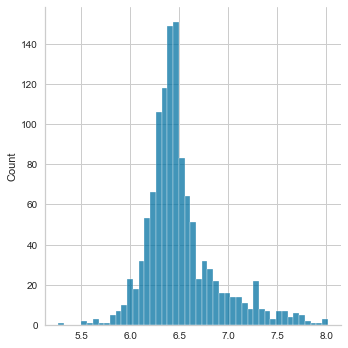

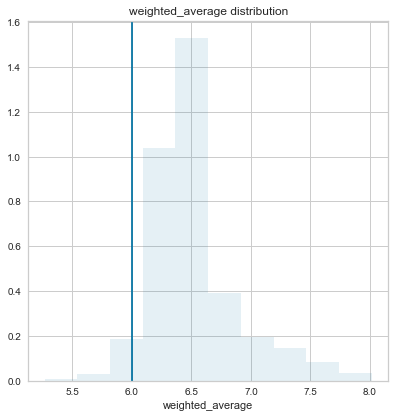

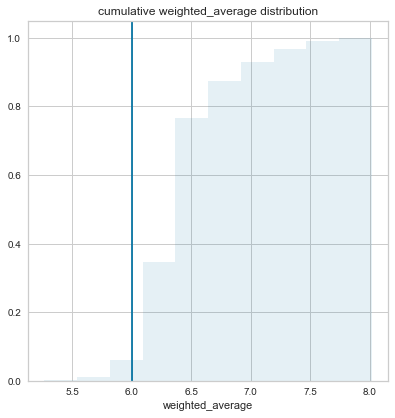

In [24]:

import scipy.stats as st

data = movies_df.loc[:, 'weighted_average'].values

sns.displot(data=data)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.hist(
    data,
    alpha=0.1,
    bins=10,
    density=True
)

ax.axvline(x=6)
plt.xlabel('weighted_average')
plt.title('weighted_average distribution')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(
    data,
    alpha=0.1,
    bins=10,
    density=True,
    cumulative=True
)
ax.axvline(x=6)

plt.xlabel('weighted_average')
plt.title('cumulative weighted_average distribution')
plt.show()

In [25]:
movies_df= movies_df.query('weighted_average >= 6')

movies_df.head(1)

,movieId,title,keywords,genres,popularity,vote_count,vote_average,overview,cast,crew,weighted_average,score
0,10,GoldenEye,"[cuba, falsely accused, secret identity, compu...","[Adventure, Action, Thriller]",59.824565,1174,6.6,James Bond must unmask the mysterious head of ...,"[Pierce Brosnan, Sean Bean, Izabella Scorupco]","[Eric Serra, Tina Turner, Ian Fleming]",6.502307,0.258846


#### First get all tokens from the columns mentioned above

In [26]:
#First get all tokens from overview columns
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())
movies_df['tag'] = movies_df['overview'] + movies_df['genres'] + movies_df['keywords'] + movies_df['cast'].replace(' ', '_', regex=True) + movies_df['crew'].replace(' ', '_', regex=True)
movies_with_tag_df = movies_df.drop(columns=['overview','genres','keywords','cast','crew'])


In [27]:
movies_with_tag_df['tag'] = movies_with_tag_df['tag'].apply(lambda x: " ".join(x))
movies_with_tag_df

,movieId,title,popularity,vote_count,vote_average,weighted_average,score,tag
0,10,GoldenEye,59.824565,1174,6.6,6.502307,0.258846,James Bond must unmask the mysterious head of ...
1,25,Leaving Las Vegas,22.030517,360,7.1,6.551422,0.246182,"Ben Sanderson, an alcoholic Hollywood screenwr..."
2,47,Se7en,79.579532,5765,8.1,7.723117,0.491979,Two homicide detectives are on a desperate hun...
3,50,The Usual Suspects,64.025031,3254,8.1,7.531540,0.448280,"Held in an L.A. interrogation room, Verbal Kin..."
4,69,Friday,25.574800,503,7.0,6.564281,0.250544,Craig and Smokey are two guys in Los Angeles h...
...,...,...,...,...,...,...,...,...
1200,160565,The Purge: Election Year,53.727146,1306,6.1,6.288354,0.216483,Two years after choosing not to kill the man w...
1201,160573,Pete's Dragon,31.974359,679,6.2,6.367007,0.218350,Pete is a mysterious 10-year-old with no famil...
1202,160954,Nerve,62.933899,2181,7.1,6.809765,0.316494,"Industrious high school senior, Vee Delmonico,..."
1203,161127,The Infiltrator,24.672234,573,6.6,6.476314,0.234043,A U.S Customs official uncovers a massive mone...


#### Apply word embedding
- Here we have to ensure that we remove stop words. It helps to remove the low-level information from our text to focus on the important information.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(movies_with_tag_df['tag']).toarray()


####  get similarities among the vectors

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(vector)

### Now lets select a data and apply this technique

In [30]:
movies_with_tag_df[movies_with_tag_df['title'] == 'Batman Begins'].index[0]


289

In [31]:
def RecommendMovie(movie,df,similarity):
    index  = df[df['title'] == movie].index [0]
    distance = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    result=[]
    for i in distance[1:5]:
        result.append(df.iloc[i[0]].title)
    return result    

In [32]:
resuls=RecommendMovie('Batman Begins',movies_with_tag_df,cosine_similarity)

In [33]:
result_df=movies_df[movies_df["title"].isin(resuls)].sort_values('score', ascending=[False])
result_df[['movieId','title','keywords','genres','popularity','cast','crew','overview','vote_average','score']]

,movieId,title,keywords,genres,popularity,cast,crew,overview,vote_average,score
490,58559,The Dark Knight,"[dc comics, crime fighter, secret identity, sc...","[Drama, Action, Crime, Thriller]",187.322927,"[Christian Bale, Heath Ledger, Aaron Eckhart]","[Lucinda Syson, Hans Zimmer, Charles Roven]","[Batman, raises, the, stakes, in, his, war, on...",8.2,0.600665
23,858,The Godfather,"[italy, love at first sight, loss of father, p...","[Drama, Crime]",143.659698,"[Marlon Brando, Al Pacino, James Caan]","[Francis Ford Coppola, Francis Ford Coppola, G...","[Spanning, the, years, 1945, to, 1955,, a, chr...",8.4,0.572130
880,91529,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Hans Zimmer, Charles Roven, Christopher Nolan]","[Following, the, death, of, District, Attorney...",7.6,0.455212
1067,113348,Teenage Mutant Ninja Turtles,"[martial arts, terrorist, hero, mutation, van,...","[Science Fiction, Action, Adventure, Fantasy, ...",143.350376,"[Megan Fox, Will Arnett, William Fichtner]","[Michael Bay, Brian Tyler, Galen Walker]","[The, city, needs, heroes., Darkness, has, set...",5.8,0.223891


## Task 3:Recommend user based on previous ratings


In [34]:
user_df=rating_df[rating_df['userId']==77].sort_values(['rating','timestamp'], ascending=[False,False])
user_df=user_df.head(1)
user_df=user_df.merge(movies_df,on='movieId')

In [35]:
user_df

,userId,movieId,rating,timestamp,title,keywords,genres,popularity,vote_count,vote_average,overview,cast,crew,weighted_average,score,tag
0,77,8636,5.0,1535107569,Spider-Man 2,"[dual identity, love of one's life, pizza boy,...","[Action, Adventure, Fantasy]",35.149586,4321,6.7,"[Peter, Parker, is, going, through, a, major, ...","[Tobey Maguire, Kirsten Dunst, James Franco]","[Danny Elfman, Dianne Crittenden, Bill Abbott]",6.625424,0.267124,"[Peter, Parker, is, going, through, a, major, ..."


In [36]:
from collections import OrderedDict
res=[]
for x in user_df['title']:
    results=RecommendMovie(x,movies_with_tag_df,cosine_similarity)
    res.extend(results)
res = list(OrderedDict.fromkeys(res))


In [37]:
result_df=movies_df[movies_df["title"].isin(res)].sort_values('score', ascending=[False])
result_df[['movieId','title','keywords','genres','popularity','cast','crew','overview','vote_average','score']].head(10)

,movieId,title,keywords,genres,popularity,cast,crew,overview,vote_average,score
289,33794,Batman Begins,"[himalaya, martial arts, dc comics, crime figh...","[Action, Crime, Drama]",115.040024,"[Christian Bale, Michael Caine, Liam Neeson]","[Lucinda Syson, Larry J. Franco, Hans Zimmer]","[Driven, by, tragedy,, billionaire, Bruce, Way...",7.5,0.435593
170,5349,Spider-Man,"[loss of lover, spider, thanksgiving, bad boss...","[Fantasy, Action]",82.502566,"[Tobey Maguire, Willem Dafoe, Kirsten Dunst]","[Don Burgess, David Koepp, Danny Elfman]","[After, being, bitten, by, a, genetically, alt...",6.8,0.309778
1046,110553,The Amazing Spider-Man 2,"[obsession, marvel comic, sequel, based on com...","[Action, Adventure, Fantasy]",89.270217,"[Andrew Garfield, Emma Stone, Jamie Foxx]","[Hans Zimmer, Pietro Scalia, Mark Friedberg]","[For, Peter, Parker,, life, is, busy., Between...",6.5,0.271813
411,52722,Spider-Man 3,"[dual identity, amnesia, sandstorm, love of on...","[Fantasy, Action, Adventure]",115.699814,"[Tobey Maguire, Kirsten Dunst, James Franco]","[Francine Maisler, Joseph M. Caracciolo Jr., S...","[The, seemingly, invincible, Spider-Man, goes,...",5.9,0.212415
